# Synoptic Validation

## `Teaching Ourselves'

### (Recipe Coding versus Prison Coding)

<br>

#### But first: A photo challenge!    

#### (Hint: 'Anything goes!')

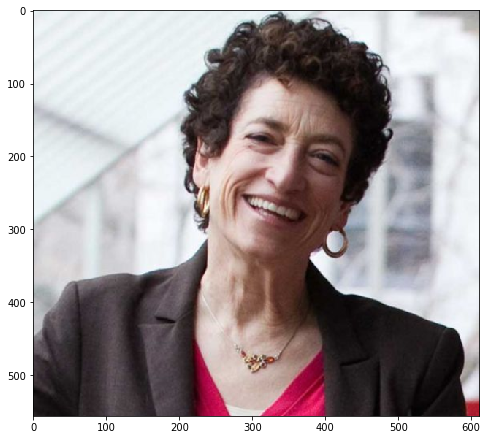

In [28]:
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
img=matplotlib.image.imread('./Professor.png')
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img)

* Argument from authority is a logical fallacy
  - And yet...

## glodap


This notebook looks into GLODAP data and **also** demonstrates a number of features of the Jupyter
notebook environment. This is the first step in my *validation* program. 


[Global Ocean Data Analysis Project (GLODAP)](https://www.glodap.info/)
is a *static snapshot* of the state of ocean across biological, chemical and physical observables. Let me 
emphasize: GLODAP is not time-series data.


This notebook touches on temperature, salinity and dissolved oxygen where each is held in a corresponding
103MB netCDF file. The files are available for open download on an AWS cloud object storage bucket called 'himatdata'. For more on this please see the associated Jupyter notebook 'botocp' which uses the **boto** Python library to **cp** the 
files to your local directory. 


**Note: We work to move away from the 'get a local copy' pattern but to save time: Not so here.**


Each file is about 100MB. From there these netcdf files are accessed 
using the standard xarray mechanism.


#### Digression 1 of 3: Many resources


[This OOI web page](https://rawdata.oceanobservatories.org/files/) features a *ton* of 
ocean data; one drop in the bucket... beyond OHW let's agree to **keep making time to explore.**


I'm deputized by Deb as a proxy oceanographer... I like to say 'Whaaaa????' so please say 
it with me, thanks, now you are deputized as well. 


As (colleague) has shown advances in technology lower barriers (red queen); and so with software 
(consider Altair)... so I have the option of leaving an artifact for the next me. We are each of 
us the most valuable resource in our race against time. 



#### Digression 2 of 3: For ref: The Jupyter notebook directory structure


* Notebook directory structure
  * ```~/revelle/dev_notebooks/rob/ ```   Notebooks by topic
  * ```~/data/```
    * ```glodap/glodap.ipynb```           Global Ocean Data Analysis Program
    * ```argo/argo.ipynb```               Nine argo drifters (platforms): Multiple profiles
    * ```cava/shallowprofiler.ipynb```    OOI cabled array shallow profiler
    * ```NASA/cmr.ipynb```                NASA Common Metadata Repository (includes a look at MODIS)
    * ```kilroy/kilroy.py```              A collection of convenient utility functions
    * ```videos/msla.mp4```               Animation made from matplotlib plots
    * ```audio/Hydrophone_example.mp3```  Humpback vocalizations
    * ```images/ etcetera```              Convenient images to place inline here
  * ```~/creds```                         OOI credentials


#### Digression 3 of 3: Rusty hinge remarks

* Do not use Shift-Enter; use Ctrl-Enter (keeps focus on the current cell)
* As code evolves: Move 'solved problem' methods into a little ```.py``` library file. I use ```kilroy.py```
  * ...must re-copy ```kilroy.py``` from source directory to ```./ ``` for ```import```
  * ...and speaking of Recipes versus Prisons
    * ...noting Make disassembles Prisons 
    * ...From Kilroy to RPPC (Don, Filipe)


* There are 86,400 seconds in a day and 31 million in a year


* Cells that are...
  * ...unnecessary begin with the comment ```# Don't```
  * ...possibly interesting begin with ```Optional```
  * ...do something central to the purpose begin with ```Run```


#### Notebook features

- Linux utilities
- Import static images
- Play YouTube vid
- Play local mp4 animation
- copy data: Cloud to this Docker pod
- deconstruct netcdf / xarray DataSets 
- Dynamic (widget) display
- ipyleaflet-based maps
- function aggregator **kilroy.py**


#### Links


- [Jupyter notebook editing shortcuts](https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/)
- [GLODAP home](https://www.glodap.info/)
- [Wikipedia](https://en.wikipedia.org/wiki/Global_Ocean_Data_Analysis_Project)


In [29]:
# Run this cell
#
# Configuration steps (cf argo.ipynb)

import sys
import os
from shutil import copyfile
from sys import exit

%matplotlib inline

from matplotlib import pyplot as plt
import pandas as pd
import netCDF4
import xarray as xr

from ipywidgets import *
from traitlets import dlink

data_dir = '/home/jovyan/data/glodap/'
local_salinity_filename = data_dir + 'glodap_salinity.nc'
local_temperature_filename = data_dir + 'glodap_temperature.nc'
local_oxygen_filename = data_dir + 'glodap_oxygen.nc'

print('\nI am running Python {}...'.format(sys.version_info[0]))

import kilroy

print(kilroy.nudir(kilroy), '\n')
print(kilroy.lsal('/home/jovyan/data/glodap/*.nc'), '\n')



I am running Python 3...
['Show', 'ShowImageFromGitHub', 'ShowLocal', 'getCASite', 'getCASites', 'lsal', 'nudir'] 

['-rw-rw-r-- 1 jovyan 1000 102664419 Jan 18  2017 /home/jovyan/data/glodap/glodap_oxygen.nc\n', '-rw-rw-r-- 1 jovyan 1000 102664370 Jan 18  2017 /home/jovyan/data/glodap/glodap_salinity.nc\n', '-rw-rw-r-- 1 jovyan 1000 102664315 Jan 18  2017 /home/jovyan/data/glodap/glodap_temperature.nc\n'] 



In [ ]:
# Optional
# 
# Video content from YouTube
getYouTubeVideo = False

if getYouTubeVideo:
    from IPython.display import YouTubeVideo
    YouTubeVideo('MLM0fjy8Vz8')
    # https://youtu.be/G0DCb3lH_uU

In [ ]:
# Optional
# 
# Video content from YouTube
getYouTubeVideo = False

if getYouTubeVideo:
    # On the sounds of the ocean including diel vertical migration or DVM
    from IPython.display import YouTubeVideo
    YouTubeVideo('HdHW77blulg')

In [ ]:
# Optional
# 
# Professor Oreskes discusses science and confidence (TED talk)
from IPython.display import YouTubeVideo
YouTubeVideo('RxyQNEVOElU')

In [35]:
# Optional
# 
# Playback: Humpback vocalizations
# Resource: See (for example) https://rawdata.oceanobservatories.org/files/RS01SLBS/LJ01A/09-HYDBBA102/2017/10/07/

import IPython
IPython.display.Audio("/home/jovyan/data/audio/Hydrophone_example.mp3")

In [38]:
%%HTML
<div align="middle">
<video width="100%" controls>
      <source src="/home/jovyan/data/videos/msla.mp4" type="video/mp4">
</video></div>

### GLODAP data


If the GLODAP data are not present in /home/jovyan/data/glodap (three 103MB .nc files): Please open the **botocp**
notebook in this directory and run the appropriate cell. *boto* is an older Python library for accessing S3 storage
on the Amazon cloud.


# Deconstruction

In which we assign the three GLODAP files -- these are scalar fields of salinity temperature and dissolved oxygen --
to xarray Datasets. And then 'What does this mean? How do we *get at* the data values???'

In [ ]:
# Run (make sure the data files are in place!)
#
# ...above the glodap files became xarray datasets: dsO2, dsTemp, dsSal are oxygen, temperature and salinity respectively


# This code is specific to our purpose here, to look at some GLODAP data...
dsSal  = xr.open_mfdataset(local_salinity_filename)
dsTemp = xr.open_mfdataset(local_temperature_filename)
dsO2   = xr.open_mfdataset(local_oxygen_filename)

dsO2          # This prints the structure of the oxygen dataset below

### Please look carefully at the above longitude...

**Core dumps** of xarray Datasets deserve some scrutiny.  'Does this make sense?' The latitudes are sensible 
but the longitudes are not: 20.5 to... what? Perhaps 380? Comparison with other data must accommodate.


### ...and this generally looks rather complicated...


As with ARGO I jump down to Attributes (there are 6). Very manageable.
Some Attributes are truncated with an ellipsis... After some *thrashing* 
(I tried things like ```dsO2['Attributes']['Description']```, one of many fails) I realized: 
xarray Dataset **Attributes** prints nicely:

```
print(dsO2.Description)
print(dsO2.Citation)
```

Now back up to Data variables: I see *oxygen* and this must be *dissolved* oxygen.
But units of this dissolved oxygen? It would make sense to associate those units 
directly with the data variable *oxygen*. I can use the 'dir' Python directory function to expand the data variable 
components. The entire DO xarray Dataset is *dsO2*; there is a data variable *oxygen*, it has a sub-component *units*. Therefore...

```
print(dsO2.oxygen.units)
```

And so on...

In [ ]:
# Optional
# 
# digging in

print('\n')
print(dsO2)                 # indicates 'oxygen'
print('\n')
print(dsO2.oxygen)          # indicates 'units'
print('\n')
print(dsO2.Comment)         # this is garbled. Norwegian?
print('\n')
print(dsO2.Description)     # notice no units are mentioned!
print('\n')
print(dsO2.Citation)        # fine
print('\n')
print(dsO2.oxygen.units)    # aha at last!
print('\n')

In [ ]:
# Optional
# 
# Sure enough that longitude range is not insane... but it is sure to be inconvenient.
print(dsO2.lon)

What about the Python **inspect** module? Let's give that a whirl... and it proves to be very helpful with 
the next question: How can we index a particular location within the data array, i.e. do label-based indexing?

In [ ]:
# Optional
#
# dig in further

import inspect
print(inspect.getdoc(dsO2))

### Seeing some numerical values

Data first light...

In [ ]:
# Optional
#
# This code indexes into the Oxygen dataset and prints a few example oxygen values
dsO2['oxygen'][0:2,90:92,120:122].values   # a few dissolved oxygen values near the surface

In [ ]:
# Optional
#
# This code indexes into the temperature dataset to demonstrate the 'mean()' method
print(dsTemp['temperature'][0,20:24,160:200].values.mean())
print(dsTemp['temperature'][0,80:100,160:200].values.mean())
# dir(dsTemp['temperature'][0,170:174,320:324].values.mean)

In [ ]:
# Don't
# Enabling nbextensions should not be needed here... but sometimes widgets don't work so this is a clue if that happens  
# !jupyter nbextension enable --py widgetsnbextension

In [ ]:
# Optional
#
# This creates a 2D color-coded view of oxygen at the surface, attaching a slider to a depth parameter

def plotOxygen(depth_index):
    a=dsO2['oxygen'].sel(depth_surface = depth_index)
    a.plot(figsize=(16, 10),cmap=plt.cm.bwr,vmin=150, vmax=350)
    msg = 'This is for '
    if depth_index == 0: msg += 'surface water'
    else: msg += 'water at ' + str(int(dsO2['Depth'].values[depth_index])) + ' meters depth'
    plt.text(25, -87, msg, fontsize = '20')
    plt.text(28, 50, 'oxygen dissolved in', fontsize = '20')
    plt.text(28, 42, '     ocean water   ', fontsize = '20')

# This is the interactive slider
interact(plotOxygen, depth_index=widgets.IntSlider(min=0,max=32,step=1,value=0, continuous_update=False))

In [ ]:
# Optional
#
# This creates a 2D color-coded view of salinity at the surface, attaching a slider to a depth parameter

def plotSalinity(depth_index):
    b = dsSal['salinity'].sel(depth_surface = depth_index)
    b.plot(figsize=(16, 10),cmap=plt.cm.bwr,vmin=33, vmax=36)
    msg = 'This is for '
    if depth_index == 0: msg += 'surface water'
    else: msg += 'water at ' + str(int(dsO2['Depth'].values[depth_index])) + ' meters depth'
    plt.text(25, -87, msg, fontsize = '20')
    plt.text(47, 50, 'salinity of', fontsize = '20')
    plt.text(47, 42, 'ocean water', fontsize = '20')
    
interact(plotSalinity, depth_index=widgets.IntSlider(min=0,max=32,step=1,value=0, continuous_update=False))

In [ ]:
# Optional
#
# This creates a 2D color-coded view of temperature at the surface, attaching a slider to a depth parameter

def plotTemperature(depth_index):
    c=dsTemp['temperature'].sel(depth_surface = depth_index)
    c.plot(figsize=(16, 10),cmap=plt.cm.bwr,vmin=2.5, vmax=3.8)       # emphasis on cold water; typical full range is 0 to 23
    msg = 'This is for '
    if depth_index == 0: msg += 'surface water'
    else: msg += 'water at ' + str(int(dsO2['Depth'].values[depth_index])) + ' meters depth'
    plt.text(25, -87, msg, fontsize = '20')
    plt.text(47, 50, 'temperature of', fontsize = '20')
    plt.text(47, 42, 'ocean water', fontsize = '20')

interact(plotTemperature, depth_index=widgets.IntSlider(min=0,max=32,step=1,value=0, continuous_update=False))   

### Observe...

Set the slider in the above figure to 28. Notice that the mid-Atlantic vents heat the water... if one is rushing. And notice that the southeast Carribean is quite warm at depth... perhaps it is drawing warm water downward.


### Something as simple as depth can be daunting

Let's look at the temperature xarray Dataset... what are the depths of the depth axis?


In [ ]:
# Optional
#
# From Dataset to Dataarray... looking at 'Depth'. How many values? 33. How do we get at them? .values

print (dsTemp['Depth'], '\n')
print (dsTemp['Depth'].values[10], '\n')
print (dsTemp['Depth'].values)

### Using *nearest* to interrogate at a particular location


We have three glodap datasets, each indices depth, lat and lon. 
We would like to compare this with data from the water column at the 
[Oregon Slope Base site in the OOI cabled array](https://interactiveoceans.washington.edu/story/_Slope_Base_Study_Site_PN1A).
The location is 44.6, -125.4 and the water depth is 2900 meters. Let's begin with oxygen; here are some notes...


#### xarray as an extension of pandas: some notes on indexing, operations, dimension names and coordinate indices 

- Apply operations like summing: Over dimensions by name: ```x.sum('time')```
- Select values by label instead of integer location: ```x.loc['2014-01-01']``` or ```x.sel(time='2014-01-01')```
- Mathematical operations (```x - y```) vectorize across multiple dimensions
  - This is called array broadcasting based on dimension names, not shape.
- **groupby** facilitates compression along a dimension: ```x.groupby('time.dayofyear').mean()```
- **align** for database-like alignment that smoothly handles missing values: ```x, y = xr.align(x, y, join='outer')```
- **x.attrs** to track arbitrary metadata as a Python dictionary
- **pandas** provides many of these features...
  - ...but it does not make use of dimension names and its core data structures are fixed dimensional arrays

In [ ]:
# Run
#
# Prints depths and an oxygen profile: Nearest to a particular map location.
# Notice the 'idiosyncrasy' of requiring a positive longitude; in fact a longitude in the allowed range of 
#   20.5+. This gives us the Pacific-centric map but it is rather arbitrary.
#
# OSB indicates the location given is for the Oregon Slope Base site. However (kilroy) this should properly
#   be dredged up from a call to getCASites(), not hard-coded.
#
# We have the peculiar constraint of the longitude range of the data; so there is a little hardcoded += 360

glodap_depths_list          = dsO2['Depth'].values
glodap_OSB_DO_list          = dsO2.oxygen.sel(lat=44.6, lon=-125.4 + 360., method = 'nearest').values
glodap_OSB_temperature_list = dsTemp.temperature.sel(lat=44.6, lon=-125.4 + 360., method = 'nearest').values
glodap_OSB_salinity_list    = dsSal.salinity.sel(lat=44.6, lon=-125.4 + 360., method = 'nearest').values

print(glodap_depths_list[0:10], '\n')
print(glodap_OSB_DO_list)
plt.plot(glodap_depths_list, glodap_OSB_DO_list)

# observe that the final 6 depths are too deep for this location
# This chart is created again below...


Observe that the glodap 'snapshot' has an increase in dissolved oxygen below a minimum at around 800 meters. The
juke at 1400 meters we could only speculate. This would be interesting to compare with the deep profiler.


### transect data (south to north, Pacific ocean)


The maps above with their 'depth level' selectors can suggest a number of questions. For example we see water gets colder
at depth; but more slowly at middle latitudes. The following cells create temperature profile graphs against latitude at a fixed depth. First this is done by simply instantiating a latitude loop. Then the idea is to do it again by providing a drawing 
map control.

In [ ]:
# Optional
#
# This cell makes a (simple) transect plot with a slider to choose the depth value

def plotTemperatureTransect(depth):
    minLat =  -60.
    maxLat =   60.
    deltaLat =  0.5
    nLats = int((maxLat - minLat)/deltaLat) + 1
    minLon, maxLon = 215., 214.        # corresponds to east-central Pacific
    deltaLon = (maxLon - minLon)/(float(nLats) - 1.)   # granted the earth is a sphere so this is non-linear
    tempList = []
    latList = []
    
    for iLat in range(nLats):
        thisLat = minLat + float(iLat)*deltaLat
        thisLon = minLon + float(iLat)*deltaLon
        thisDepth = str(dsTemp['Depth'].values[depth])
        # print(thisLat, thisLon, dsTemp['Depth'].values[depth])
        
        tempList.append(dsTemp.temperature.sel(lat=thisLat, lon=thisLon, method = 'nearest').values[depth])
        latList.append(thisLat)
        
        # This print statement shows how 'nearest' maps the transect coordinates to glodap dataset coordinates correctly
        #   It also shows a certain amount of degeneracy in the data structure
        # print(thisLat, thisLon, \
        #       dsTemp.temperature.sel(lat=thisLat, lon=thisLon, method = 'nearest').lat.lat.values,
        #       dsTemp.temperature.sel(lat=thisLat, lon=thisLon, method = 'nearest').lat.lon.values,
        #       dsTemp.temperature.sel(lat=thisLat, lon=thisLon, method = 'nearest').lon.lat.values,
        #       dsTemp.temperature.sel(lat=thisLat, lon=thisLon, method = 'nearest').lon.lon.values)

    figDim = 8
    fig, ax = plt.subplots(figsize=(figDim,figDim))
    ax.set_ylabel('temp (deg C)')
    ax.set_xlabel('latitude (deg)', color='black')
    ax.plot(latList, tempList, '-o', lw=2., ms=3.0, color='black', mec='red', mfc='red')  
    ax.text(0.8, 0.8, 'depth ' + str(thisDepth), ha='center', va='center', transform=ax.transAxes, fontsize='14')
    
    # auto-reset the axes each time...
    # ax.set_ylim([min(tempList), max(tempList)])
    # ax.set_xlim([min(latList), max(latList)])
    # ...versus fixed axes to facilitate comparison at different depths
    ax.set_ylim(0., 30.)
    ax.set_xlim(-60., 60.)

    # m = Map(center=(45.5, -127.5), zoom=7, layout=Layout(width='100%', height='900px'))
    # wms = WMSLayer(url="http://gmrt.marine-geo.org/cgi-bin/mapserv?map=/public/mgg/web/gmrt.marine-geo.org/htdocs/services/map/wms_merc.map", layers='topo')
    # m.add_layer(wms)
    # m

interact(plotTemperatureTransect, depth=widgets.IntSlider(min=0,max=32,step=1,value=0, continuous_update=False))   

In [ ]:
# Optional
#
# By the way since T(d) is monotonic with depth why not just stack them all?
# The results here take about a minute to render -- rather slow -- 

minLat =  -60.
maxLat =   60.
deltaLat =  0.5
nLats = int((maxLat - minLat)/deltaLat) + 1
minLon, maxLon = 215., 214.        # corresponds to east-central Pacific
deltaLon = (maxLon - minLon)/(float(nLats) - 1.)   # granted the earth is a sphere so this is non-linear
figDim = 8
fig, ax = plt.subplots(figsize=(figDim,figDim))
ax.set_ylabel('temp (deg C)')
ax.set_xlabel('latitude (deg)', color='black')
ax.set_ylim(0., 30.)
ax.set_xlim(-60., 60.)

for d in range(33):
    tempList = []
    latList = []
    
    for iLat in range(nLats):
        thisLat = minLat + float(iLat)*deltaLat
        thisLon = minLon + float(iLat)*deltaLon
        thisDepth = str(dsTemp['Depth'].values[d])        
        tempList.append(dsTemp.temperature.sel(lat=thisLat, lon=thisLon, method = 'nearest').values[d])
        latList.append(thisLat)

    ax.plot(latList, tempList, '-o', lw=2., ms=2.0, color='black', mec='red', mfc='red')  

### vertical profile


Everything above (GLODAP) is static. Now: We have some data pulled from OOI called 'osb01.nc'. This is...

* dynamic...
* A netcdf file (> associate with an xarray Dataset **osb**)
* From the **O**regon **S**lope **B**ase site (2900m)
* Shallow profiler CTD; depths will run 200m to near-surface (5m), 9 profiles per day
* Starts 2017 January 1, extends to 2017 Jan 30 (hour 1): At roughly one-second intervals
  * That is 2.5 million observations but in practice a mere 2.4 million

In [ ]:
# Run

import matplotlib.colors as colors
osb   = xr.open_mfdataset('/home/jovyan/data/ooi/osb01.nc')
print(86400*29, 'hypothetical samples over 29 days\n\n')
print(osb)

In [ ]:
print(osb.time.values, '\n')
print(len(osb.time), 'samples\n')
print(osb.time.values[1200000])

In [ ]:
# print(3*'\n')
# print(osb.dissolved_oxygen.units)    # behold: also micro-moles per kilogram
# plt.plot(osb.dissolved_oxygen)
a=120000
b=a+86400
print((b-a)/3600, 'hours involved')
osbDO = osb.corrected_dissolved_oxygen.values[a:b]
osbTime = osb.time.values[a:b]
osbPressure = osb.seawater_pressure[a:b]
osbSalinity = osb.practical_salinity[a:b]
osbTemperature = osb.seawater_temperature[a:b]
figDim = 8
fig, ax = plt.subplots(4, figsize=(figDim,3*figDim))
ax[0].plot(osbPressure, osbDO)
ax[1].plot(osbTime, osbPressure)
ax[2].plot(osbPressure, osbTemperature)
ax[3].plot(osbPressure, osbSalinity)
ax[0].set_title('DO against depth')
ax[1].set_title('depth against time')
ax[2].set_title('Temp against depth')
ax[3].set_title('Salinity against depth')
ax[0].set_xlabel('depth (~m)')
ax[1].set_xlabel('time')
ax[2].set_xlabel('depth (~m)')
ax[3].set_xlabel('depth (~m)')
ax[0].set_ylabel('DO (umol / Liter)')
ax[1].set_ylabel('depth (~m)')
ax[2].set_ylabel('Temperature (deg C)')
ax[3].set_ylabel('Salinity (psu)')
ax[1].invert_yaxis()

# superimpose a glodap profile from this location
ax[0].plot(glodap_depths_list[0:10], glodap_OSB_DO_list[0:10])
ax[2].plot(glodap_depths_list[0:10], glodap_OSB_temperature_list[0:10])
ax[3].plot(glodap_depths_list[0:10], glodap_OSB_salinity_list[0:10])


In [ ]:
# Optional
#
# Show glodap profiles at a chosen OOI Cabled Array location
# Please notice that the depth range is taken from the cabled array ephemeris, not from glodap
#   This is because glodap's depth estimate is some sort of average and tends to be shallower


def PlotGlodapProfileAtCabledArraySite(location_choice, data_type_choice):
    
    site = kilroy.getCASite(location_choice)
    
    # This commented-out code is specific to Oregon Slope Base site: Showing where it is, how deep
    # siteOSB = kilroy.getCASite(1)
    # osbLat = siteOSB[1]
    # osbLon = siteOSB[2] + 360.    # to place longitude in the 'familiar' range of the glodap Dataset
    # obsDep = siteOSB[3]
    # print('  ...btw the Oregon slope base site is at', round(osbLat, 2), 
    #       ',', round(osbLon, 2), '(the depth is', round(obsDep, 0), ')')

    if data_type_choice == 0:
        gloZ, gloD = dsO2['Depth'].values, dsO2.oxygen.sel(lat=site[1], lon=site[2]+360., method='nearest').values
        dataMin, dataMax, tMsg = 0., 350., 'GLODAP vertical profile: Dissolved oxygen'
    elif data_type_choice == 1: 
        gloZ, gloD = dsTemp['Depth'].values, dsTemp.temperature.sel(lat=site[1], lon=site[2]+360., method='nearest').values
        dataMin, dataMax, tMsg = 0., 16., 'GLODAP vertical profile: temperature'
    else:
        gloZ, gloD = dsSal['Depth'].values, dsSal.salinity.sel(lat=site[1], lon=site[2]+360., method='nearest').values
        dataMin, dataMax, tMsg = 30., 37., 'GLODAP vertical profile: salinity'

    # print(len(gloD), len(gloZ), gloD, gloZ)
    figDim = 8
    fig, ax = plt.subplots(figsize=(figDim,figDim))

    depthMin, depthMax = 0., site[3]
    ax.set_xlim(depthMin, depthMax)
    ax.set_ylim(dataMin, dataMax)
    ax.text(0.5, 0.95, tMsg, ha='center', va='center', transform=ax.transAxes, fontsize='14')
    ax.text(0.5, 0.9, site[0], ha='center', va='center', transform=ax.transAxes, fontsize='14')
    ax.text(0.5, 0.85, 'lat ' + str(round(site[1],2)) + ', lon ' + str(round(site[2], 2)), 
            ha='center', va='center', transform=ax.transAxes, fontsize='14')
    # make clear the x-axis
    ax.set_xlabel('depth (meters)')
    # BEHOLD!!! We are cashing in our Excellent Skills on *units* of the DO
    ax.set_ylabel(dsO2.oxygen.units)    
    ax.plot(gloZ, gloD, marker = 'o', markersize = 4, markerfacecolor = 'k', color = 'r', linewidth = 2)
    
    if location_choice == 1: 
        ax.plot(osbPressure, osbDO)
        ax.text(0.5, 0.8, '(blue is OSB shallow profile data)', ha='center', va='center', transform=ax.transAxes, fontsize='14')

        # Hurray: Oregon Slope Base chosen; we have time-series data for the top 200 meters...
        # osb   = xr.open_mfdataset('')
        

# I'm afraid the indexing here is hardcoded to correspond to the 'kilroy.py' functions
interact(PlotGlodapProfileAtCabledArraySite, 
            location_choice={'Oregon Slope Base':              1, \
                             'Endurance Offshore':             0, \
                             'Southern Hydrate Ridge':         2, \
                             'Axial Base':                     3, \
                             'Axial ASHES Vent Field':         4, \
                             'Axial Caldera Center':           5, \
                             'Axial Caldera East':             6, \
                             'Axial International Vent Field': 7  \
                            }, 
            data_type_choice={'dissolved oxygen': 0, 'temperature': 1, 'salinity': 2 })

# Bolted On: From the argo notebook

In [ ]:
# Run

import sys
import os
from shutil import copyfile
from sys import exit
import datetime
from datetime import datetime
import time

%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import netCDF4
import xarray as xr

# makes widgets available, particularly 'interact()' used extensively in what follows
from ipywidgets import *
from traitlets import dlink

# This and related are useful: https://ipyleaflet.readthedocs.io/en/latest/api_reference/map.html
import ipyleaflet
from ipyleaflet import Map, WMSLayer, Marker, Polygon, CircleMarker, Circle, LayerGroup, Rectangle

from kilroy import nudir
from kilroy import lsal
from kilroy import getCASite
from kilroy import getCASites

print(kilroy.nudir(kilroy), '\n')

In [ ]:
# Run 

# Generates the xarray dataset list ds[] referring to all 9 ARGO platform 'profile' data files

# Moving on let's suppose the various drifter files are residing in a directory called 2018_jan_thru_apr
# We'll open them in sequence eventually but for now let's just try the first one; so 'ds' will be a single dataset

fnm_field_index = 8                                          # index of the filename field after the ls line is split
ds=[]                                                        # when it is time to expand to a list of datasets

datapath = '/home/jovyan/data/argo/'                          # path to .nc argo files
stipulate = 'argo-profiles*.nc'                               # profiles; not trajectories for now
r = lsal(datapath + stipulate)                                # r is a (ls -al) list of profile data files
for q in r:
    b=q.split()[fnm_field_index].rstrip()                     # filename with no whitespace
    ds.append(xr.open_mfdataset(b))                           # ds now a working dataset list (with but one element)
print(len(ds), '(should be 9)')

In [ ]:
# Optional
# map out a typical ARGO platform dataset
ds[1]

In [ ]:
# Optional

# Here are some attributes of the second dataset (ds[1]) which includes 29 profiles
d = ds[1]
print(d.title)
print(d.Conventions)
# print(d.REFERENCE_DATE_TIME)   # Always prints 19500101000000 but JULD is now given in absolute, not relative time
print(len(d.N_PROF))             # Across ds[] prints 1, 29, 3, 36, 23, 70, 5, 13, 11: Varying number of profiles
print(len(d.N_HISTORY))          # Across ds[] prints 9, 9, 8, 11, 7, 4, 8, 10, 5; counts of version histories
# print(d.HISTORY_DATE.values)   # Changes in history?
# print(d.HISTORY_ACTION.values) # shows a lot of (Failed QC) and so on
print(d.PARAMETER)
print(d.PRES)
print(d.PRES_QC)
print(d.PRES_ADJUSTED)
print(d.PRES_ADJUSTED_QC)
print(d.PRES_ADJUSTED_ERROR)

In [ ]:
# Optional
# 
# Creates a triplet list of profiles in chronological order across all of the available ARGO platforms. (dt, prof, platform)
# Introducing datetimes is a bit of a side-project learning curve. datetime.strptime seems like a good interpretive method
#   as it supports a sort of regex format string; well documented at http://strftime.org/. I ran out of patience as these
#   datetime strings include garbage nanosecond values e.g. '.000000256' and so I resorted to good old .split()
#
# Now we should have the option of creating a time-sequence slider that compares ARGO profiles to coincident data:
#   shallow profilers, glodap (taken as a sort of constant), MODIS SST and so on.
#

src, tOrder = [], []
for d in ds:
    for prof in range(len(d.N_PROF)):
        ymd = list(map(int,str(d['JULD'].sel(N_PROF = prof).values).split('T')[0].split('-')))
        hms = str(d['JULD'].sel(N_PROF = prof).values).split('T')[1].split(':')
        sec = int(float(hms[2])+0.5)
        if sec >= 60: sec -= 60
        src.append((datetime(ymd[0], ymd[1], ymd[2], int(hms[0]), int(hms[1]), sec), prof, int(d.PLATFORM_NUMBER[0].values)))

for i in range(len(src)): tOrder.append(min(dt for dt in src if dt not in tOrder))

# producing a timedelta:
print(len(tOrder), 'profiles spanning', tOrder[-1][0]-tOrder[0][0])

# could increase timedelta chops by determining largest and smallest *deltas* in this list

In [ ]:
# Optional

# kilroy need distance in km from chosen CA site
# kilroy need glodap comparative
# kilroy need a CA comparative 

nPlatforms = len(ds)      # in this example there are 9 ARGO drifter platforms

gPlatformIndex = 0        # global variables
gDataChoice = 0
gModeChoice = 0


# translates depth from pressure (decibars) to meters; but this is approximately 1:1
def depth_meters(p, latitude): # p = pressure in decibars, latitude is in decimal degrees
    x = np.power(np.sin(latitude / 57.29578), 2.)
    g = 9.780318 * (1.0 + (5.2788e-3 + 2.36e-5*x)*x) + 1.092e-6*p
    depth_meters = ((((-1.82e-15*p + 2.279e-10)*p - 2.2512e-5 )*p + 9.72659)*p) / g
    return depth_meters


# Draws a profile or multiple depending on how the controls (below) are set
def ProfilePlotter(profileIndex):
    
    global gPlatformIndex
    global gDataChoice
    global gModeChoice

    # for fixing plot ranges
    minSal, maxSal = 30., 35.
    minTemp, maxTemp = 2., 14.
    minDep, maxDep = 0., 2000.
    
    # fairly large figure
    figDim = 11
        
    # Tells (for the 9 drifter platforms) how many profiles there are for each
    profNums = ''
    for i in range(nPlatforms): profNums += str(len(ds[i].N_PROF)) + '  '
    print(profNums)
    
    # if either a single platform + profile is chosen; or 'all profiles' for a single platform: ...
    if gModeChoice < 2:
        
        # select the proper platform -> d
        d = ds[gPlatformIndex]
        nProfiles = len(d.N_PROF)
        
        # If single platform + profile...
        if gModeChoice == 0:
            
            # In this and subsequent lines the select method '.sel()' is used to slice out a section 
            #   of the DataArray. Since I'm new to these: This is certainly not optimal code!
            
            x=depth_meters(d['PRES'].sel(N_PROF = profileIndex), d['LATITUDE'].sel(N_PROF = profileIndex))
            if gDataChoice == 0: y, minY, maxY = d['PSAL'].sel(N_PROF = profileIndex), minSal, maxSal
            elif gDataChoice == 1: y, minY, maxY = d['TEMP'].sel(N_PROF = profileIndex), minTemp, maxTemp

        # Else if all profiles for this platform...
        elif gModeChoice == 1:
            x=depth_meters(d['PRES'].sel(), d['LATITUDE'].sel())
            if gDataChoice == 0: y, minY, maxY = d['PSAL'].sel(), minSal, maxSal
            elif gDataChoice == 1: y, minY, maxY = d['TEMP'].sel(), minTemp, maxTemp
            
        # Now here comes the chart
        plt.figure(figsize=(figDim, figDim))
        plt.plot(x , y, '-o', lw=2., ms=3.0, c='black', mec='red', mfc='red')
        plt.xlim(minDep, maxDep)
        plt.ylim(minY, maxY)

    else:   # gModeChoice == 2: One massive plot of all platforms, all profiles...
        
        # Owing to multiple datasets contributing to this single plot I use the 'subplot' mechamism.
        #   This has the plotting entity become an 'axis' called ax. This is a somewhat mystifying 
        #   element of matplotlib. 
        
        fig = plt.figure(figsize=(figDim,figDim))
        ax = fig.add_subplot(111)
        ax.set_xlim([minDep, maxDep])
        if gDataChoice == 0: 
            minY, maxY = minSal, maxSal
            for d in ds:
                x = depth_meters(d['PRES'].sel(), d['LATITUDE'].sel())
                y = d['PSAL'].sel()
                ax.plot(x , y, '-o', lw=2., ms=3.0, c='black', mec='red', mfc='red')
        elif gDataChoice == 1: 
            minY, maxY = minTemp, maxTemp
            for d in ds:
                x = depth_meters(d['PRES'].sel(), d['LATITUDE'].sel())
                y = d['TEMP'].sel()
                ax.plot(x , y, '-o', lw=2., ms=3.0, c='black', mec='red', mfc='red')
                
        ax.set_ylim([minY, maxY])

# This function is called by the interact() code that follows
#   It is passed a platform index (0 through 8) which in turn determinesthe range of profiles made available
#   on the profile-selector slider. So it is one way of creating data-dependant slider controls.
def ProfileSelector(dataChoice, modeChoice, platformIndex):
    global gDataChoice
    global gModeChoice
    global gPlatformIndex
    gDataChoice = dataChoice
    gModeChoice = modeChoice
    gPlatformIndex = platformIndex
    maxProfiles = len(ds[gPlatformIndex].N_PROF)
    if modeChoice == 0:
        interact(ProfilePlotter, profileIndex=widgets.IntSlider(min=0,max=maxProfiles-1,step=1,value=0,continuous_update=False))
    else:
        ProfilePlotter(0)

# This creates a data type dropdown chooser, a mode chooser and a slider for selecting a platform from among the 9 available
#   Notice that it calls the function just above; which in turn calls the main plotting function. 
interact(ProfileSelector, 
         dataChoice={'salinity': 0, 'temperature': 1 },         
         modeChoice={'single profile': 0, 'all profiles for platform': 1, 'all profiles': 2 },
         platformIndex=widgets.IntSlider(min=0, max=nPlatforms-1, step=1,value=1, continuous_update=False))


In [ ]:
# Optional

# For more detail see comments in the prior to plotting cells

# sort the profiles by time
src, tOrder = [], []
for d in ds:
    for prof in range(len(d.N_PROF)):
        ymd = list(map(int,str(d['JULD'].sel(N_PROF = prof).values).split('T')[0].split('-')))
        hms = str(d['JULD'].sel(N_PROF = prof).values).split('T')[1].split(':')
        sec = int(float(hms[2])+0.5)
        if sec >= 60: sec -= 60
        src.append((datetime(ymd[0], ymd[1], ymd[2], int(hms[0]), int(hms[1]), sec), prof, int(d.PLATFORM_NUMBER[0].values)))

for i in range(len(src)): tOrder.append(min(dt for dt in src if dt not in tOrder))

    
nPlatforms = len(ds)
nTimeProfiles = len(tOrder)
dsIndices = []
for i in range(nPlatforms):dsIndices.append(int(ds[i].PLATFORM_NUMBER[0].values))
    
def depth_meters(p, latitude): # p = pressure in decibars, latitude is in decimal degrees
    x = np.power(np.sin(latitude / 57.29578), 2.)
    g = 9.780318 * (1.0 + (5.2788e-3 + 2.36e-5*x)*x) + 1.092e-6*p
    depth_meters = ((((-1.82e-15*p + 2.279e-10)*p - 2.2512e-5 )*p + 9.72659)*p) / g
    return depth_meters

def ProfileTimeSeries(time):
    timeProfileIndex = time
    minSal, maxSal, minTemp, maxTemp, minDep, maxDep = 30., 35., 2., 14., 0., 2000.    
    figDim = 9
    platformIndex = dsIndices.index(tOrder[timeProfileIndex][2])
    d = ds[platformIndex]
    profileIndex = tOrder[timeProfileIndex][1]
    x=depth_meters(d['PRES'].sel(N_PROF = profileIndex), d['LATITUDE'].sel(N_PROF = profileIndex))
    y0, minY0, maxY0 = d['PSAL'].sel(N_PROF = profileIndex), minSal, maxSal
    y1, minY1, maxY1 = d['TEMP'].sel(N_PROF = profileIndex), minTemp, maxTemp
    
    fig, ax0 = plt.subplots(figsize=(figDim,figDim))
    ax1 = ax0.twinx()

    color = 'red'
    ax0.set_xlabel('depth (meters)')
    ax0.set_ylabel('salinity (psu)', color=color)
    ax0.plot(x, y0, '-o', lw=2., ms=3.0, color=color, mec='red', mfc='red')
    ax0.tick_params(axis='y', labelcolor=color)

    color = 'black'
    ax1.set_ylabel('temp (C)', color=color)
    ax1.plot(x, y1, '-o', lw=2., ms=3.0, c=color, mec=color, mfc=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax0.set_ylim([minY0, maxY0])
    ax0.set_xlim([minDep, maxDep])
    ax1.set_ylim([minY1, maxY1])

    ax0.text(1100, 33, tOrder[timeProfileIndex][0], fontsize = '16')
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    ax0.set_title('ARGO Depth Profile (Salinity and Temperature) with Time Slider')

interact(ProfileTimeSeries, \
         time=widgets.IntSlider(min=0, max=nTimeProfiles-1, step=1, value=95, continuous_update=False))


In [ ]:
# Optional
#
# To compare ARGO to cabled array data and other data we will benefit from a map. This cell creates such a thing
#   and begins piling on content as layers; starting with Lamont's multi-resolution bathymetric data available from
#   a very fine WMS server. WMS = Web Mapping Service and it is worth knowing the basics; see for example Wikipedia.
#
# 
# The following shell command should not in principle be necessary to run... 
# !jupyter nbextension enable --py --sys-prefix ipyleaflet
# 
# 
# Where are the OOI cabled array sites located? This is hard-coded in the kilroy.getCASites() method; but yodapy gives access
#   to these locations in a much more general / clean manner.
#   Sites should be indexed via dictionary but (kilroy) that is not implemented yet.
#
# 0. Endurance Offshore:       600 meters { deep, shallow, BEP, (surface mooring) }
#                                             ...and the BEP includes hydrophone, ADCP, pH, CO2, VEL3D
# 1. Oregon Slope Base:       2900 meters { deep, shallow, BEP }
# 2. Southern Hydrate Ridge:   770 meters { various instruments }
# 3. Axial Base: Location:    2650 meters { shallow profiler, deep profiler, sea floor instruments }
#
# Axial caldera sites follow: 1520 meters
#
#   4. Axial ASHES Vent Field             { CAMHD, covis, ... }
#   5. Axial Caldera Center
#   6. Axial Caldera East
#   7. Axial International Vent Field
# 
# kilroy.getCASite(1) will return a 5-tuple ('Oregone Slope Base', lat, lon, depth, 'comment')
#

# this generates the map with a zoom control
m = Map(center=(45.5, -127.5), zoom=7, layout=Layout(width='100%', height='900px'))

# This WMS works as sporadic over basemap
# wms = WMSLayer(url="https://www.gmrt.org/services/mapserver/wms_merc_mask?request=GetCapabilities&service=WMS&version=1.0.0", layers='topo')  
# This one works and is more uniform
wms = WMSLayer(url="http://gmrt.marine-geo.org/cgi-bin/mapserv?map=/public/mgg/web/gmrt.marine-geo.org/htdocs/services/map/wms_merc.map", layers='topo')
m.add_layer(wms)

# Mark out the cabled array sites: Accumulating a set of circles into a LayerGroup
circle_tuple = ()
site_colors = ['red', 'orange', 'yellow', 'green', 'cyan', 'blue', 'violet', 'white']
sites = getCASites()

for i in range(8):
    thisCircle = Circle(location=(sites[i][1], sites[i][2]), radius=14, color=site_colors[i], fill_color=site_colors[i])
    circle_tuple += (thisCircle,)  
m.add_layer(LayerGroup(layers=circle_tuple))
m

# For each ARGO drifter create a track that marks out all the profile sites
# This first block generates a distinct set of 63 colors
poly_color = []
ck = ['00','55', 'AA', 'FF']
for i in range(4):
    for j in range(4):
        for k in range(4):
            if not (i == 0 and j == 0 and k == 0):
                poly_color.append('#'+ck[k]+ck[j]+ck[i])

# This second block creates a poly-line with markers for the ARGO platform track; for all platforms
thisProfiler = 0
for d in ds:
    polygonVertices = []
    circle_tuple = ()
    for i in range(len(d.N_PROF)):
        thisLocation=(round(d.LATITUDE.values[i],4),round(d.LONGITUDE.values[i],4))
        thisDateString = str(d.JULD.values[i]).split('.')[0]  # legerdemain to remove a spurious trailing decimal
        circle_marker = CircleMarker(location = thisLocation, draggable=False, title=thisDateString, \
                                     radius=1, color=poly_color[thisProfiler], fill_color='red', fill_opacity = 1.0)
        circle_tuple += (circle_marker,)
        polygonVertices.append(thisLocation)

    # layer_group = LayerGroup(layers=circle_tuple)    
    m.add_layer(LayerGroup(layers=circle_tuple))
    
    # This is kludgy... it reverses through all the vertices to wind up back at the starting point
    #   This is because I could not figure out how to omit the last connecting line of a polygon
    for v in list(reversed(polygonVertices)):polygonVertices.append(v)
    polygon = Polygon(locations=polygonVertices, color="black", weight=1, fill=False)
    m.add_layer(polygon)
    thisProfiler += 1

# Display that map
m